<a href="https://colab.research.google.com/github/brunatoloti/data-science-do-zero/blob/main/Minera%C3%A7%C3%A3o%20de%20Textos%20e%20NLP/mineracao_textos1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mineração de Textos

- Mineração de textos usando Python

**Importando as bibliotecas**

In [ ]:
import nltk
import re
from nltk.corpus import wordnet

Fazendo algumas operações com regex para relembrar

In [ ]:
text = "Data Science!!!!, Mineração de Texto !??!!;;()"
re.sub(r'[-./?!,":;()\']', '', text) #Removendo caracteres que não importam da frase (muito usado em data cleaning)

'Data Science Mineração de Texto '

**Trabalhando com NLTK**

Fazendo o download dos pacotes da NLTK

In [ ]:
#nltk.download()

Separando as palavras da lista, transformando-as em tokens da NLTK

In [ ]:
string = 'Python é uma linguagem sensacional'
words = nltk.word_tokenize(string)
words

['Python', 'é', 'uma', 'linguagem', 'sensacional']

Obtendo a frequência de cada palavra 

In [ ]:
from nltk import FreqDist
frequency = FreqDist(['python', 'python', 'python', 'Data Science', 'linguagem', 'programação', 'Data Science','mineração'])
frequency

FreqDist({'Data Science': 2,
          'linguagem': 1,
          'mineração': 1,
          'programação': 1,
          'python': 3})

Usando o método *values()* na variável *frequency* para obter apenas os valores de frequência das palavras

In [ ]:
frequency.values()

dict_values([3, 2, 1, 1, 1])

Obtendo a palavra de  maior frequência, usando o método *max()*, ou seja, retorna a chave que possui maior valor em *frequency*



In [ ]:
frequency.max()

'python'

*O objeto FreqDist possui métodos de dicionário, o que nos ajuda bastante dependendo da tarefa que precisamos realizar*

Plotando a frequência de palavras em uma determinada lista (base)

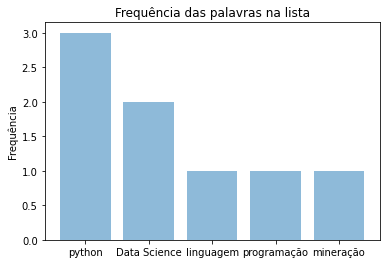

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

words = frequency.keys()
y_pos = np.arange(len(words))
count = frequency.values()

plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, words)
plt.ylabel('Frequência')
plt.title('Frequência das palavras na lista')

plt.show()

**Stemming**


*   Dicionários léxicos.
*   Reduz uma palavra na forma do seu radical.
*   Usado para fazer pré-processamento de dados.
*   Muito utilizado devido às inúmeras variações de palavras que, muitas vezes, não são relevantes ao modelo ou que pode até prejudicar o modelo. Dessa forma, reduzimos, bastante, o número de palavras únicas da base.
*   Porém, dependendo do modelo ou da tarefa a ser realizada, utilizar o stemming se torna prejudicial para o resultado. Por isso, é sempre importante analisar o resultado usando e não usando o stemming e, assim, decidir se, para aquele caso, ele melhora ou não o resultado.
*   Pode não ser muito bom usar com Análise de Sentimentos.





Instanciando um stemming em Português

In [ ]:
stemmer = nltk.stem.RSLPStemmer()

Exemplos




1.   Trabalhou - Trabalhava - Trabalha - Trabalha


In [ ]:
stemmer.stem('Trabalhou')

'trabalh'

In [ ]:
stemmer.stem('Trabalhava')

'trabalh'

In [ ]:
stemmer.stem('Trabalha')

'trabalh'

In [ ]:
stemmer.stem('Trabalhar')

'trabalh'

Instanciando um stemming em Inglês

In [ ]:
stemmer = nltk.stem.SnowballStemmer('english')

Exemplos



1.   running - run

In [ ]:
stemmer.stem('running')

'run'

In [ ]:
stemmer.stem('run')

'run'



2.   have - having



In [ ]:
stemmer.stem('have')

'have'

In [ ]:
stemmer.stem('having')

'have'

Criando uma função para aplicar Stemming

In [ ]:
def Stemming(st):
    stemmer = nltk.stem.RSLPStemmer()
    words = []
    for w in st.split():
        words.append(stemmer.stem(w))
    return (" ".join(words))

In [ ]:
Stemming('Ele trabalhava frequentemente no projeto de criação de novos produtos')

'ele trabalh frequ no projet de cri de nov produt'

**Lemmatization**



*   Desflexiona uma palavra para determinar o seu *lema*.
*   Técnica usada para fazer pré-processamento de dados.
*   Até a data de execução do notebook, não havia em Português.



Importando a biblioteca

In [ ]:
from nltk.stem import WordNetLemmatizer

Instanciando o objeto

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
#Encontrando o lema da palavra cats
print(lemmatizer.lemmatize('cats'))    #parâmetro pos (part of speech) por default é substantivo (n)

cat


Buscando o lema para 'is' do tipo substantivo (pos='n')

In [ ]:
lemmatizer.lemmatize('is', pos='n')     

'is'

Buscando o lema para 'is' do tipo verbo (pos='v')

In [ ]:
lemmatizer.lemmatize('is', pos='v')

'be'

Da mesma forma o 'are'

In [ ]:
lemmatizer.lemmatize('are', pos='v')

'be'

Buscando o lema para 'better' do tipo adjetivo (pos='a')

In [ ]:
lemmatizer.lemmatize('better', pos='a')

'good'

Buscando o lema para 'best' do tipo adjetivo

In [ ]:
lemmatizer.lemmatize('best', pos='a')

'best'

Buscando o lema para 'running' do tipo substantivo

In [ ]:
lemmatizer.lemmatize('running', pos='n')

'running'

Buscando o lema para 'running' do tipo verbo

In [ ]:
lemmatizer.lemmatize('running', pos='v')

'run'

Buscando o lema para 'running' do tipo adjetivo

In [ ]:
lemmatizer.lemmatize('running', pos='a')

'running'

Diferenças entre Stemming e Lemmatization:
*   O Stemming, quando não encontra a raiz da palavra, geralmente, ele trunca a palavra (o que pode ser um problema, podemos ter um retorno de algo que não existe). Isso não ocorre no Lemmatization (no Lemmatization, ele traz a própria palavra se ele não encontra um lema do tipo especificado).
*   Stemming geralmente se refere a um processo heurístico bruto que corta as pontas das palavras na esperança de atingir seu objetivo corretamente na maioria das vezes, e muitas vezes inclui a remoção de afixos derivacionais.
*   O Lemmatization geralmente se refere a fazer as coisas corretamente com o uso de um vocabulário e análise morfológica de palavras, normalmente com o objetivo de remover apenas desinências flexionais e retornar a forma base ou dicionário de uma palavra, que é conhecido como lema. 
*   Por exemplo:  Se confrontado com o token saw, o Stemming pode retornar apenas s, enquanto o Lemmatization tentaria retornar see ou saw dependendo se o uso do token foi como um verbo ou um substantivo. 



**StopWords**

*   Palavras ou termos que são muito usados, mas que, normalmente, não têm nenhum significado ou relevância, como por exemplo os artigos 'é', 'o', 'a'.
*   Técnica usada para pré-processamento de textos.
*   Possui dicionário de palavras em Português.

Instanciando o objeto

In [ ]:
stopwords = nltk.corpus.stopwords.words('portuguese')

Visualizando as 10 primeiras palavras que estão em stopwords

In [ ]:
stopwords[:10]

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']

Essas palavras são as que a NLTK considera como StopWords em sua base de dados. Esse dicionário é muito competente e foi feito por pessoas altamente entendidas, porém, vale lembrar que, para cada negócio, podemos ter StopWords diferentes, ou seja, deve ser feita uma avaliação desse dicionário antes de usar em seu negócio, para ver se faz sentido.

Criando uma função para aplicar as StopWords nos dados

In [ ]:
def RemovingStopWords(st):
    st = st.lower()
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    words = [i for i in st.split() if not i in stopwords]
    return (" ".join(words))

In [ ]:
sentence1 = "Olá, mundo! Estou trabalhando com textos no curso de Mineração de Textos do MinerandoDados.com.br"

In [ ]:
RemovingStopWords(sentence1)

'olá, mundo! trabalhando textos curso mineração textos minerandodados.com.br'

In [ ]:
sentence2 = "Seu trabalho de NLP será super interessante com as aulas de Mineração de Textos"

In [ ]:
RemovingStopWords(sentence2)

'trabalho nlp super interessante aulas mineração textos'

É sempre bom usar com moderação e sempre testar os resultados entre usar ou não usar as stopwords. Isso serve também para o Stemming e o Lemmatization.

**Part of Speech**



*   Part of Speech, na tradução literal, significa *Partes da Fala*.
*   Consiste em identificar a **função gramatical** das palavras em um texto.
*   A função gramatical da palavra muda dependendo de como ela é empregada no texto.



Gerando os tokens de uma frase e passando a lista para o método pos_tag()

In [ ]:
text = nltk.word_tokenize("O blog MinerandoDados é muito bom")

nltk.pos_tag(text)

[('O', 'NNP'),
 ('blog', 'NN'),
 ('MinerandoDados', 'NNP'),
 ('é', 'NNP'),
 ('muito', 'NN'),
 ('bom', 'NN')]

In [ ]:
nltk.help.upenn_tagset('NNP') #Substantivo, próprio, singular

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


In [ ]:
nltk.help.upenn_tagset('NN') #Substantivo, comum, singular

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


Observe que o pos_tag errou algumas coisas, por exemplo, em determinar que 'é' é um substantivo próprio singular e não um verbo. Além disso, 'bom' é um adjetivo, mas foi classificado como substantivo comum singular.

Outro exemplo

In [ ]:
text = nltk.word_tokenize("João comprou um presente muito legal")

nltk.pos_tag(text)

[('João', 'NNP'),
 ('comprou', 'NN'),
 ('um', 'JJ'),
 ('presente', 'NN'),
 ('muito', 'FW'),
 ('legal', 'JJ')]

In [ ]:
nltk.help.upenn_tagset('JJ') #Adjetivo ou numeral, ordinal

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


In [ ]:
nltk.help.upenn_tagset('FW') #Palavra estrangeira

FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...


Observe que o pos_tag errou aqui também, por exemplo, em determinar que 'comprou' é um substantivo comum singular e não um verbo. Além disso, 'muito' foi classificado como uma palavra estrangeira, e não é.

Ou seja, podemos concluir que o recurso pos_tag() da NLTK não consegue classificar tão bem palavras do idioma Português; há algumas falhas na classificação.

Vejamos como o pos_tag() se sai para palavras em Inglês

In [ ]:
text = nltk.word_tokenize("My print is very good")

nltk.pos_tag(text)

[('My', 'PRP$'),
 ('print', 'NN'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('good', 'JJ')]

In [ ]:
nltk.help.upenn_tagset('PRP$') #Pronome possessivo

PRP$: pronoun, possessive
    her his mine my our ours their thy your


In [ ]:
nltk.help.upenn_tagset('VBZ') #Verbo

VBZ: verb, present tense, 3rd person singular
    bases reconstructs marks mixes displeases seals carps weaves snatches
    slumps stretches authorizes smolders pictures emerges stockpiles
    seduces fizzes uses bolsters slaps speaks pleads ...


In [ ]:
nltk.help.upenn_tagset('RB') #Advérbio

RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...


Observe que para essa frase em inglês, o pos_tag() se saiu muito bem, não errando nenhuma classificação. O que nos mostra como esse método ainda é ruim para palavras em Português.

Vejamos com outra frase em Inglês

In [ ]:
text = nltk.word_tokenize("Hi, my name is Bruna. I want to print the outstanding invoice")

nltk.pos_tag(text)

[('Hi', 'NNP'),
 (',', ','),
 ('my', 'PRP$'),
 ('name', 'NN'),
 ('is', 'VBZ'),
 ('Bruna', 'NNP'),
 ('.', '.'),
 ('I', 'PRP'),
 ('want', 'VBP'),
 ('to', 'TO'),
 ('print', 'VB'),
 ('the', 'DT'),
 ('outstanding', 'JJ'),
 ('invoice', 'NN')]

In [ ]:
nltk.help.upenn_tagset('PRP') #Pronome pessoal

PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us


In [ ]:
nltk.help.upenn_tagset('VBP') #Verbo

VBP: verb, present tense, not 3rd person singular
    predominate wrap resort sue twist spill cure lengthen brush terminate
    appear tend stray glisten obtain comprise detest tease attract
    emphasize mold postpone sever return wag ...


In [ ]:
nltk.help.upenn_tagset('TO') #Preposição

TO: "to" as preposition or infinitive marker
    to


In [ ]:
nltk.help.upenn_tagset('DT')

DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


Da mesma forma que tivemos na frase anterior em inglês, as palavras dessa frase também foram muito bem classificadas.

Essa é uma tarefa é muito útil e amplamente utilizada.

Além disso, é uma técnica difícil devido as funções gramaticais de cada idioma.

Existem projetos que utilizam Machine Learning para implementar POS.

**Wordnet**



*   O Wordnet é um grande banco de dados léxico de substantivos, verbos, adjetivos e advérbios.
*   Essas palavras são agrupadas em conjuntos de sinônimos, cada um expressando um conceito distinto.
*   Os sinônimos são interligados pelo seu significado semântico conceitual e suas relações léxicas.
*   O Wordnet é uma grande rede de conceitos interligados e é amplamente utilizado em pesquisas no mundo todo.
*   O NLTK possui uma interface de acesso ao Wordnet.

Para saber mais: https://wordnet.princeton.edu/

OBS.:
*   Existem diversas variações do Wordnet para outros idiomas.
*   Para Português, ainda existem poucas iniciativas.



Importando a biblioteca

In [ ]:
from nltk.corpus import wordnet

Consultando sinônimos para a palavra *bike*

In [ ]:
wordnet.synsets('bike')

[Synset('motorcycle.n.01'), Synset('bicycle.n.01'), Synset('bicycle.v.01')]

No resultado acima, note que temos 'bicycle.n.01' e 'bicycle.v.01'. Como o primeiro é n.01, quer dizer que é o substantivo bicycle (bicicleta); já o segundo é v.01, o que quer dizer que é o verbo bicycle (andar de bicicleta).

Consultando a definição de um ou mais sinônimos da palavra *bike*, ou da própria palavra *bike*

In [ ]:
wordnet.synset('bicycle.n.01').definition()

'a wheeled vehicle that has two wheels and is moved by foot pedals'

In [ ]:
wordnet.synset('bicycle.v.01').definition()

'ride a bicycle'

In [ ]:
wordnet.synset('motorcycle.n.01').definition()

'a motor vehicle with two wheels and a strong frame'

Consultando a hierarquia de termos

In [ ]:
#Hiponimos da palavra 'bicycle'
#Conceitos mais específicos, derivações.

wordnet.synset('bicycle.n.01').hyponyms()

[Synset('bicycle-built-for-two.n.01'),
 Synset('mountain_bike.n.01'),
 Synset('ordinary.n.04'),
 Synset('push-bike.n.01'),
 Synset('safety_bicycle.n.01'),
 Synset('velocipede.n.01')]

In [ ]:
#Hiperonimos da palavra 'bicycle'
#Conceitos mais genericos

wordnet.synset('bicycle.n.01').hypernyms()

[Synset('wheeled_vehicle.n.01')]

In [ ]:
#Meronyms da palavra 'bicycle'
#Conceitos de partes de outros conceitos

wordnet.synset('bicycle.n.01').part_meronyms()

[Synset('bicycle_seat.n.01'),
 Synset('bicycle_wheel.n.01'),
 Synset('chain.n.03'),
 Synset('coaster_brake.n.01'),
 Synset('handlebar.n.01'),
 Synset('kickstand.n.01'),
 Synset('mudguard.n.01'),
 Synset('pedal.n.02'),
 Synset('sprocket.n.02')]